#Importación Librerías


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Proyecto Inteligencia Computacional/df_2.xlsx'
df = pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, decimals=3)

        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [100]:
def countFreq(arr, n):
     
    # Mark all array elements as not visited
    visited = [False for i in range(n)]
 
    # Traverse through array elements
    # and count frequencies
    for i in range(n):
         
        # Skip this element if already
        # processed
        if (visited[i] == True):
            continue
 
        # Count frequency
        count = 1
        for j in range(i + 1, n, 1):
            if (arr[i] == arr[j]):
                visited[j] = True
                count += 1
         
        print(arr[i], count)

# Tratamiento de Datos

Eliminamos las variables con mas de 150 valores nulos

In [101]:
df_copy = df.copy()
for i in df_copy:
  if df_copy[i].isna().sum() >= 150:
     df_copy = df_copy.drop(columns = [i]) 

Por lo tanto juntaremos clases las clases SNIIb, SNIIn y SNII en una sola clase puesto que tiene pocos ejemplos


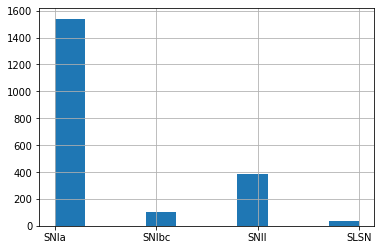

In [102]:
df_copy['classALeRCE']= df_copy['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
df_copy['classALeRCE'].hist()
df_copy = df_copy.dropna()

Lo que podemos hacer adicionalemente es crear datasets distintos en donde se tengan sólamente 2 clases: la clase de interés y una clase que junte el resto de clases. Es por esto que podemos hacer para este caso cuatro datasets distintos. A continuación se importarán las librerías necesarias para modelar una MLP

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
Le = LabelEncoder()

In [104]:
#librerias necesarias para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [105]:
# Se procede a crear una red neuronal tipo MLP.
def mi_red(num_hidden_layers, 
           num_neurons_per_layer, 
           dropout_rate,
           activation,
           n_var):
  
  # Capa de entrada
  inputs = tf.keras.Input(shape = (n_var.shape[1],))

  x = tf.keras.layers.Dropout(dropout_rate)(inputs) 

  # Capas ocultas
  for i in range(num_hidden_layers):
    x = tf.keras.layers.Dense(num_neurons_per_layer[i], activation = activation)(x)
    
    x = tf.keras.layers.Dropout(dropout_rate)(x)
  
  # Capa de salida

  outputs = tf.keras.layers.Dense(2, activation = 'sigmoid')(x)

  # Se crea el modelo con el input y los outputs.
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

def graficos_entreno(metrica, h):

  # Se crea la figura.
  f = plt.figure()

  # Se procede a graficar la métrica ingresada.
  plt.plot(h.history[metrica])
  plt.plot(h.history['val_{}'.format(metrica)])

  # Se realizan las anotaciones del gráfico.
  plt.title('model {}'.format(metrica))
  plt.ylabel(metrica)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  return f

# Modelo para clase SNIa

In [106]:
df_SNIa = df_copy.copy()
df_SNIa.replace({"SNIbc": 'Otra', "SNII": 'Otra', "SLSN": 'Otra'}, inplace = True)

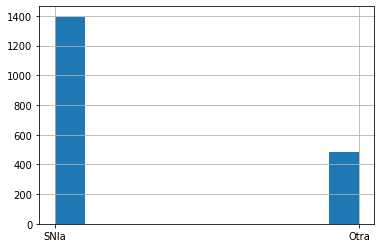

In [107]:
df_SNIa['classALeRCE'].hist()

In [108]:
X = df_SNIa.drop(columns = ['classALeRCE', 'oid'])
X = scaler.fit_transform(X)
y = df_SNIa['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
countFreq(y_test, len(y_test))

SNIa 432
Otra 131


In [110]:
#Ahora convertiremos nuestras variables objetivo en categorias, para poder entrenar nuestro modelo, puesto que keras no acepta variables numericas como variables objetivo para clasificacion.
y_train = pd.get_dummies(y_train, columns = ['classALeRCE'])
y_test = pd.get_dummies(y_test, columns = ['classALeRCE'])

In [111]:
modelo_tarea = mi_red(num_hidden_layers = 2, 
                   num_neurons_per_layer = [40,40], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train)
modelo_tarea.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 107)]             0         
                                                                 
 dropout_21 (Dropout)        (None, 107)               0         
                                                                 
 dense_21 (Dense)            (None, 40)                4320      
                                                                 
 dropout_22 (Dropout)        (None, 40)                0         
                                                                 
 dense_22 (Dense)            (None, 40)                1640      
                                                                 
 dropout_23 (Dropout)        (None, 40)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 82  

In [112]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un binary_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente binary_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 128.
history_tarea = modelo_tarea.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, verbose = 1, batch_size = 128, callbacks= early_stopping_monitor)

Epoch 1/1000
11/11 [==============================] - 1s 29ms/step - loss: 0.7821 - recall: 0.3641 - val_loss: 0.7624 - val_recall: 0.3801
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.7533 - recall: 0.4318 - val_loss: 0.7361 - val_recall: 0.4369
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.7142 - recall: 0.5019 - val_loss: 0.7138 - val_recall: 0.5098
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6928 - recall: 0.5270 - val_loss: 0.6950 - val_recall: 0.5684
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6817 - recall: 0.5773 - val_loss: 0.6796 - val_recall: 0.6217
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6708 - recall: 0.6116 - val_loss: 0.6654 - val_recall: 0.6536
Epoch 7/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6583 - recall: 0.6542 - val_loss: 0.6521 - val_recall: 0.6998
Epoch 8/1000
11/11 [=============

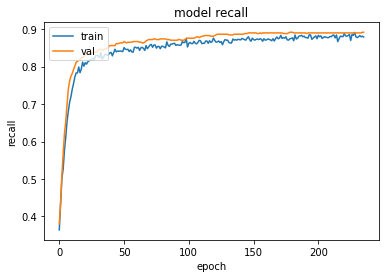

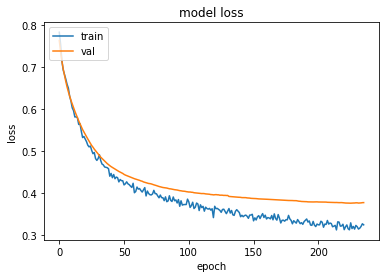

In [113]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('recall', history_tarea)
plt.show()


f4 = graficos_entreno('loss', history_tarea)
plt.show()

In [114]:
y_testeo = y_test.to_numpy()
predictions = modelo_tarea.predict(
      x=X_test
    , batch_size=10
    , verbose=0
)

In [115]:
modelo_tarea.get_layer

<bound method Model.get_layer of <keras.engine.functional.Functional object at 0x7fe174265340>>

18/18 [==============================] - 0s 1ms/step
Classification report MLP
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       131
           1       0.90      0.97      0.93       432

    accuracy                           0.89       563
   macro avg       0.88      0.80      0.83       563
weighted avg       0.89      0.89      0.88       563

Normalized confusion matrix


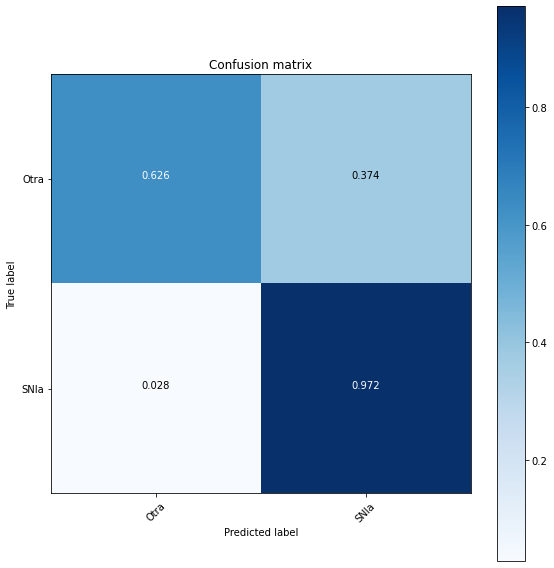

In [116]:
y_predict = modelo_tarea.predict(X_test)

y_test = y_test.to_numpy()
y_test = y_test.astype('float32')

y_test_classes = y_test.argmax(1)
y_pred_classes = y_predict.argmax(1)

# Comparamos con classification_report
print('Classification report MLP')
print(classification_report(y_test_classes, y_pred_classes))

cm = confusion_matrix(y_test_classes, y_pred_classes)
plot_confusion_matrix(cm, ['Otra', 'SNIa'], normalize=True) 

# Modelo para clase SNIbc

In [117]:
df_SNIbc = df_copy.copy()
df_SNIbc.replace({"SNIa": 'Otra', "SNII": 'Otra', "SLSN": 'Otra'}, inplace = True)

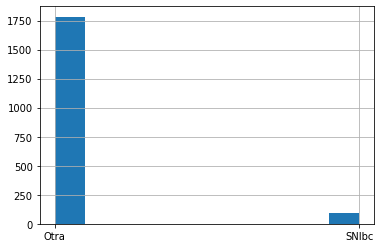

In [118]:
df_SNIbc['classALeRCE'].hist()

In [119]:
X = df_SNIbc.drop(columns = ['classALeRCE', 'oid'])
X = scaler.fit_transform(X)
y = df_SNIbc['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
countFreq(y_test, len(y_test))

Otra 591
SNIbc 29


In [121]:
#Ahora convertiremos nuestras variables objetivo en categorias, para poder entrenar nuestro modelo, puesto que keras no acepta variables numericas como variables objetivo para clasificacion.
y_train = pd.get_dummies(y_train, columns = ['classALeRCE'])
y_test = pd.get_dummies(y_test, columns = ['classALeRCE'])

In [122]:
modelo_tarea = mi_red(num_hidden_layers = 2, 
                   num_neurons_per_layer = [40,40], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train)
modelo_tarea.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 107)]             0         
                                                                 
 dropout_24 (Dropout)        (None, 107)               0         
                                                                 
 dense_24 (Dense)            (None, 40)                4320      
                                                                 
 dropout_25 (Dropout)        (None, 40)                0         
                                                                 
 dense_25 (Dense)            (None, 40)                1640      
                                                                 
 dropout_26 (Dropout)        (None, 40)                0         
                                                                 
 dense_26 (Dense)            (None, 2)                 82  

In [123]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un binary_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente binary_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 256.
history_tarea = modelo_tarea.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, verbose = 1, batch_size = 128, callbacks= early_stopping_monitor)

Epoch 1/1000
10/10 [==============================] - 1s 34ms/step - loss: 0.7235 - recall: 0.4865 - val_loss: 0.6436 - val_recall: 0.6258
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6018 - recall: 0.6537 - val_loss: 0.5503 - val_recall: 0.7968
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5207 - recall: 0.7882 - val_loss: 0.4819 - val_recall: 0.8823
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4672 - recall: 0.8471 - val_loss: 0.4314 - val_recall: 0.9210
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4158 - recall: 0.9037 - val_loss: 0.3945 - val_recall: 0.9355
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3887 - recall: 0.9188 - val_loss: 0.3648 - val_recall: 0.9452
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3566 - recall: 0.9307 - val_loss: 0.3422 - val_recall: 0.9516
Epoch 8/1000
10/10 [=============

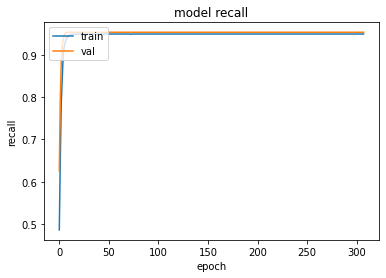

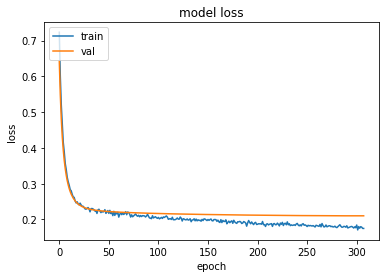

In [124]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('recall', history_tarea)
plt.show()


f4 = graficos_entreno('loss', history_tarea)
plt.show()

In [125]:
y_testeo = y_test.to_numpy()
predictions = modelo_tarea.predict(
      x=X_test
    , batch_size=10
    , verbose=0
)

0: "SNIbc"

1: "Otra"

20/20 [==============================] - 0s 1ms/step
Classification report MLP
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       591
           1       0.00      0.00      0.00        29

    accuracy                           0.95       620
   macro avg       0.48      0.50      0.49       620
weighted avg       0.91      0.95      0.93       620

Normalized confusion matrix


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


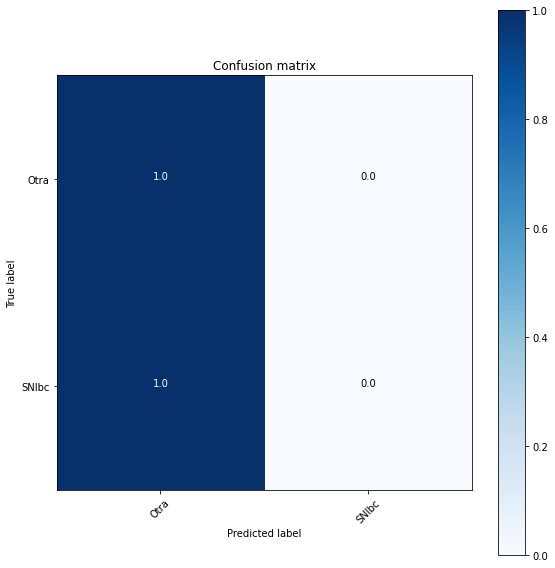

In [126]:
y_predict = modelo_tarea.predict(X_test)

y_test = y_test.to_numpy()
y_test = y_test.astype('float32')

y_test_classes = y_test.argmax(1)
y_pred_classes = y_predict.argmax(1)

# Comparamos con classification_report
print('Classification report MLP')
print(classification_report(y_test_classes, y_pred_classes))

cm = confusion_matrix(y_test_classes, y_pred_classes)
plot_confusion_matrix(cm, ['Otra', 'SNIbc'], normalize=True) 

# Modelo para clase SNII

In [127]:
df_SNII = df_copy.copy()
df_SNII.replace({"SNIa": 'Otra', "SNIbc": 'Otra', "SLSN": 'Otra'}, inplace = True)

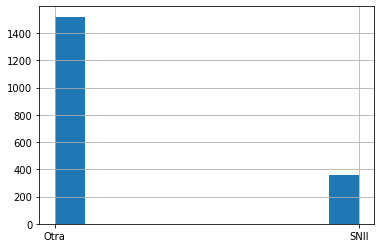

In [128]:
df_SNII['classALeRCE'].hist()

In [129]:
X = df_SNII.drop(columns = ['classALeRCE', 'oid'])
X = scaler.fit_transform(X)
y = df_SNII['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
countFreq(y_test, len(y_test))

Otra 506
SNII 114


In [131]:
#Ahora convertiremos nuestras variables objetivo en categorias, para poder entrenar nuestro modelo, puesto que keras no acepta variables numericas como variables objetivo para clasificacion.
y_train = pd.get_dummies(y_train, columns = ['classALeRCE'])
y_test = pd.get_dummies(y_test, columns = ['classALeRCE'])

In [132]:
modelo_tarea = mi_red(num_hidden_layers = 2, 
                   num_neurons_per_layer = [40,40], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train)
modelo_tarea.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 107)]             0         
                                                                 
 dropout_27 (Dropout)        (None, 107)               0         
                                                                 
 dense_27 (Dense)            (None, 40)                4320      
                                                                 
 dropout_28 (Dropout)        (None, 40)                0         
                                                                 
 dense_28 (Dense)            (None, 40)                1640      
                                                                 
 dropout_29 (Dropout)        (None, 40)                0         
                                                                 
 dense_29 (Dense)            (None, 2)                 82  

In [133]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un binary_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente binary_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 256.
history_tarea = modelo_tarea.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, verbose = 1, batch_size = 128, callbacks= early_stopping_monitor)

Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 0.6797 - recall: 0.6115 - val_loss: 0.6526 - val_recall: 0.6516
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6516 - recall: 0.6425 - val_loss: 0.6308 - val_recall: 0.6742
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6327 - recall: 0.6521 - val_loss: 0.6122 - val_recall: 0.7000
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6065 - recall: 0.6975 - val_loss: 0.5965 - val_recall: 0.7355
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5963 - recall: 0.7102 - val_loss: 0.5825 - val_recall: 0.7452
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5790 - recall: 0.7476 - val_loss: 0.5704 - val_recall: 0.7629
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5649 - recall: 0.7524 - val_loss: 0.5592 - val_recall: 0.7710
Epoch 8/1000
10/10 [=============

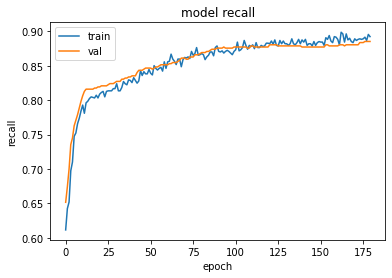

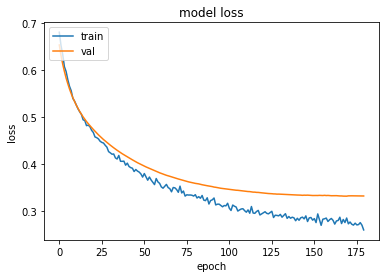

In [134]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('recall', history_tarea)
plt.show()


f4 = graficos_entreno('loss', history_tarea)
plt.show()

In [135]:
y_testeo = y_test.to_numpy()
predictions = modelo_tarea.predict(
      x=X_test
    , batch_size=10
    , verbose=0
)

0: "SNII"

1: "Otra"

20/20 [==============================] - 0s 2ms/step
Classification report MLP
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       506
           1       0.77      0.51      0.61       114

    accuracy                           0.88       620
   macro avg       0.84      0.74      0.77       620
weighted avg       0.87      0.88      0.87       620

Normalized confusion matrix


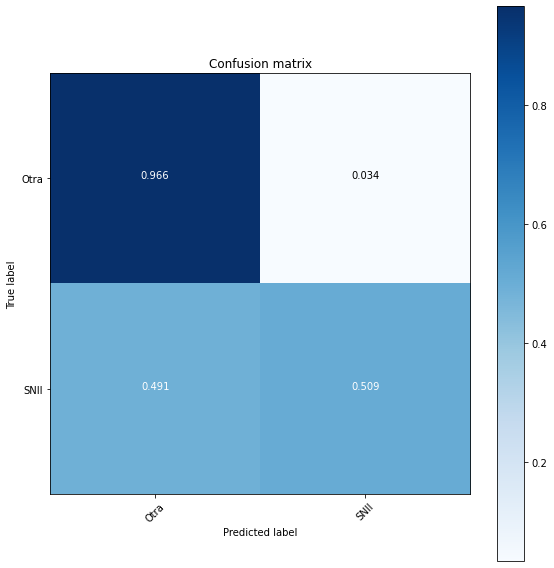

In [136]:
y_predict = modelo_tarea.predict(X_test)

y_test = y_test.to_numpy()
y_test = y_test.astype('float32')

y_test_classes = y_test.argmax(1)
y_pred_classes = y_predict.argmax(1)

# Comparamos con classification_report
print('Classification report MLP')
print(classification_report(y_test_classes, y_pred_classes))

cm = confusion_matrix(y_test_classes, y_pred_classes)
plot_confusion_matrix(cm, ['Otra', 'SNII'], normalize=True) 

# Modelo para clase SLSN

In [137]:
df_SLSN = df_copy.copy()
df_SLSN.replace({"SNIa": 'Otra', "SNIbc": 'Otra', "SNII": 'Otra'}, inplace = True)

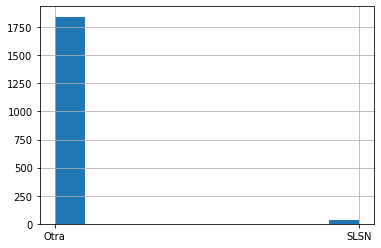

In [138]:
df_SLSN['classALeRCE'].hist()

In [139]:
X = df_SLSN.drop(columns = ['classALeRCE', 'oid'])
X = scaler.fit_transform(X)
y = df_SLSN['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
countFreq(y_test, len(y_test))

Otra 614
SLSN 6


In [141]:
#Ahora convertiremos nuestras variables objetivo en categorias, para poder entrenar nuestro modelo, puesto que keras no acepta variables numericas como variables objetivo para clasificacion.
y_train = pd.get_dummies(y_train, columns = ['classALeRCE'])
y_test = pd.get_dummies(y_test, columns = ['classALeRCE'])

In [142]:
modelo_tarea = mi_red(num_hidden_layers = 2, 
                   num_neurons_per_layer = [40,40], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train)
modelo_tarea.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 107)]             0         
                                                                 
 dropout_30 (Dropout)        (None, 107)               0         
                                                                 
 dense_30 (Dense)            (None, 40)                4320      
                                                                 
 dropout_31 (Dropout)        (None, 40)                0         
                                                                 
 dense_31 (Dense)            (None, 40)                1640      
                                                                 
 dropout_32 (Dropout)        (None, 40)                0         
                                                                 
 dense_32 (Dense)            (None, 2)                 82 

In [143]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un binary_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente binary_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 256.
history_tarea = modelo_tarea.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, verbose = 1, batch_size = 128, callbacks= early_stopping_monitor)

Epoch 1/1000
10/10 [==============================] - 1s 28ms/step - loss: 0.8538 - recall: 0.6162 - val_loss: 0.7760 - val_recall: 0.7355
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7533 - recall: 0.7118 - val_loss: 0.6849 - val_recall: 0.8242
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6710 - recall: 0.8161 - val_loss: 0.6114 - val_recall: 0.8935
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5989 - recall: 0.8694 - val_loss: 0.5512 - val_recall: 0.9403
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5553 - recall: 0.9053 - val_loss: 0.4999 - val_recall: 0.9629
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.5131 - recall: 0.9363 - val_loss: 0.4580 - val_recall: 0.9758
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4722 - recall: 0.9538 - val_loss: 0.4215 - val_recall: 0.9855
Epoch 8/1000
10/10 [=============

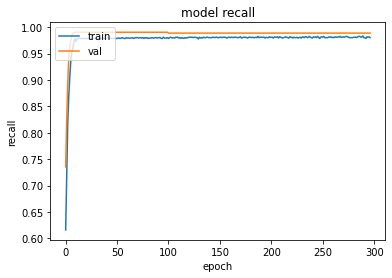

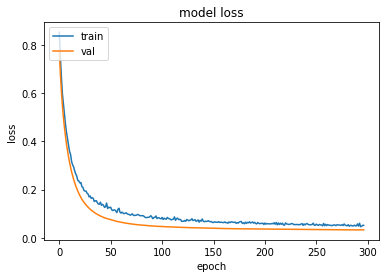

In [144]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('recall', history_tarea)
plt.show()


f4 = graficos_entreno('loss', history_tarea)
plt.show()

In [145]:
y_testeo = y_test.to_numpy()
predictions = modelo_tarea.predict(
      x=X_test
    , batch_size=10
    , verbose=0
)

0: "SLSN"

1: "Otra"

20/20 [==============================] - 0s 1ms/step
Classification report MLP
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       614
           1       0.00      0.00      0.00         6

    accuracy                           0.99       620
   macro avg       0.50      0.50      0.50       620
weighted avg       0.98      0.99      0.99       620

Normalized confusion matrix


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


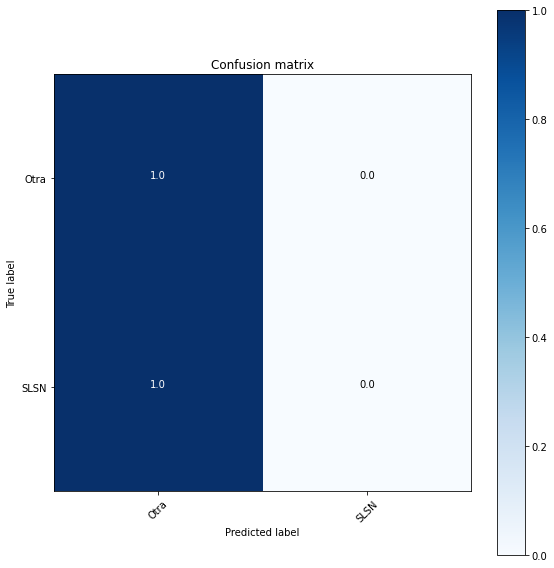

In [146]:
y_predict = modelo_tarea.predict(X_test)

y_test = y_test.to_numpy()
y_test = y_test.astype('float32')

y_test_classes = y_test.argmax(1)
y_pred_classes = y_predict.argmax(1)

# Comparamos con classification_report
print('Classification report MLP')
print(classification_report(y_test_classes, y_pred_classes))

cm = confusion_matrix(y_test_classes, y_pred_classes)
plot_confusion_matrix(cm, ['Otra', 'SLSN'], normalize=True) 

# Modelo para Multiclase

Separamos el dataset en entrenamiento y testeo, además de balancear los datos usando SMOTE 

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
Le = LabelEncoder()
X = df_copy.drop(columns = ['classALeRCE', 'oid'])
X = scaler.fit_transform(X)
y = df_copy['classALeRCE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Ahora balanceamos los datos previamente a aplicar los modelos
from imblearn.over_sampling import SMOTE
sm= SMOTE(sampling_strategy = {'SLSN': 600 , 'SNII': 356*3, 'SNIa': 1394, 'SNIbc': 96*8})
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train, y_train = X_train_smote, y_train_smote

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1068) in class SNII will be larger than the number of samples in the majority class (class #SNIa -> 923)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1394) in class SNIa will be larger than the number of samples in the majority class (class #SNIa -> 923)
  warnings.warn(


In [148]:
countFreq(y_test, len(y_test))

SNIa 471
SNII 114
SNIbc 29
SLSN 6


In [149]:
# Se procede a crear una red neuronal tipo MLP.
def mi_red(num_hidden_layers, 
           num_neurons_per_layer, 
           dropout_rate,
           activation,
           n_var):
  
  # Capa de entrada
  inputs = tf.keras.Input(shape = (n_var.shape[1],))

  x = tf.keras.layers.Dropout(dropout_rate)(inputs) 

  # Capas ocultas
  for i in range(num_hidden_layers):
    x = tf.keras.layers.Dense(num_neurons_per_layer[i], activation = activation)(x)
    
    x = tf.keras.layers.Dropout(dropout_rate)(x)
  
  # Capa de salida

  outputs = tf.keras.layers.Dense(4, activation = 'sigmoid')(x)

  # Se crea el modelo con el input y los outputs.
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

def graficos_entreno(metrica, h):

  # Se crea la figura.
  f = plt.figure()

  # Se procede a graficar la métrica ingresada.
  plt.plot(h.history[metrica])
  plt.plot(h.history['val_{}'.format(metrica)])

  # Se realizan las anotaciones del gráfico.
  plt.title('model {}'.format(metrica))
  plt.ylabel(metrica)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  return f

In [150]:
#Ahora convertiremos nuestras variables objetivo en categorias, para poder entrenar nuestro modelo, puesto que keras no acepta variables numericas como variables objetivo para clasificacion.
y_train = pd.get_dummies(y_train, columns = ['classALeRCE'])
y_test = pd.get_dummies(y_test, columns = ['classALeRCE'])

In [151]:
modelo_tarea = mi_red(num_hidden_layers = 2, 
                   num_neurons_per_layer = [40,40], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train)
modelo_tarea.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 107)]             0         
                                                                 
 dropout_33 (Dropout)        (None, 107)               0         
                                                                 
 dense_33 (Dense)            (None, 40)                4320      
                                                                 
 dropout_34 (Dropout)        (None, 40)                0         
                                                                 
 dense_34 (Dense)            (None, 40)                1640      
                                                                 
 dropout_35 (Dropout)        (None, 40)                0         
                                                                 
 dense_35 (Dense)            (None, 4)                 164

In [152]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un categorical_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente categorical_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['categorical_accuracy', 'Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 256.
history_tarea = modelo_tarea.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, verbose = 1, batch_size = 128, callbacks= early_stopping_monitor)

Epoch 1/1000
30/30 [==============================] - 1s 13ms/step - loss: 1.3981 - categorical_accuracy: 0.3008 - recall: 0.7097 - val_loss: 1.3290 - val_categorical_accuracy: 0.3661 - val_recall: 0.8065
Epoch 2/1000
30/30 [==============================] - 0s 5ms/step - loss: 1.3004 - categorical_accuracy: 0.3974 - recall: 0.7849 - val_loss: 1.2068 - val_categorical_accuracy: 0.5710 - val_recall: 0.8935
Epoch 3/1000
30/30 [==============================] - 0s 5ms/step - loss: 1.2294 - categorical_accuracy: 0.4525 - recall: 0.8167 - val_loss: 1.1254 - val_categorical_accuracy: 0.6984 - val_recall: 0.9226
Epoch 4/1000
30/30 [==============================] - 0s 5ms/step - loss: 1.1815 - categorical_accuracy: 0.5026 - recall: 0.8305 - val_loss: 1.0686 - val_categorical_accuracy: 0.7468 - val_recall: 0.9274
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 1.1272 - categorical_accuracy: 0.5358 - recall: 0.8499 - val_loss: 1.0190 - val_categorical_accuracy: 0.7661 

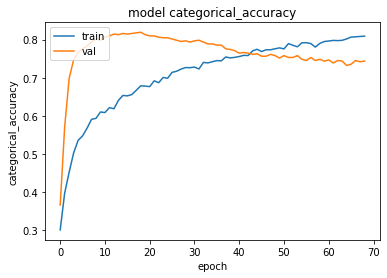

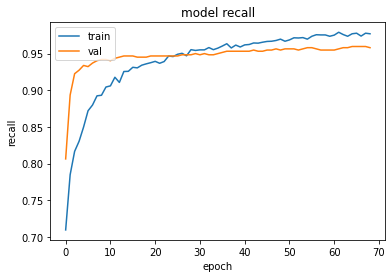

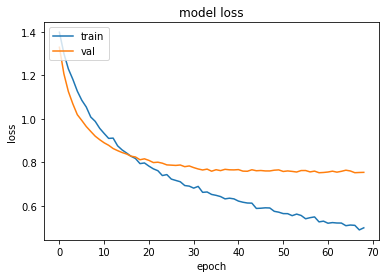

In [153]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('categorical_accuracy', history_tarea)
plt.show()

f1 = graficos_entreno('recall', history_tarea)
plt.show()

f4 = graficos_entreno('loss', history_tarea)
plt.show()

In [154]:
y_predict = modelo_tarea.predict(X_test)

20/20 [==============================] - 0s 1ms/step


In [155]:
y_test = y_test.to_numpy()
y_test = y_test.astype('float32')

In [156]:
y_test_classes = y_test.argmax(1)
y_pred_classes = y_predict.argmax(1)

In [157]:
# Comparamos con classification_report
print('Classification report MLP')
print(classification_report(y_test_classes, y_pred_classes))

Classification report MLP
              precision    recall  f1-score   support

           0       0.17      0.67      0.28         6
           1       0.59      0.60      0.59       114
           2       0.91      0.82      0.86       471
           3       0.05      0.10      0.07        29

    accuracy                           0.74       620
   macro avg       0.43      0.55      0.45       620
weighted avg       0.81      0.74      0.77       620



In [158]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

Normalized confusion matrix


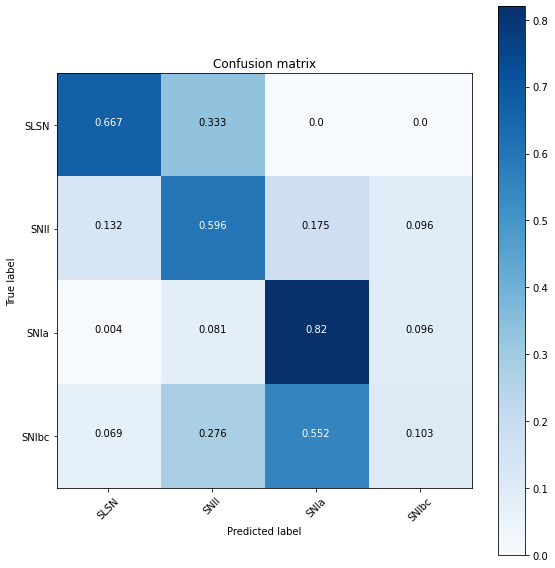

In [159]:
plot_confusion_matrix(cm, ['SLSN', 'SNII', 'SNIa', 'SNIbc'], normalize=True) 